# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

* 3層神經網路的準確度較2層高

### 參考資料
* https://dotblogs.com.tw/dragon229/2013/01/23/88750
* https://www.brilliantcode.net/1527/backpropagation-3-n-layer-neural-networks/

In [1]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)     #反向傳播
    return 1/(1+np.exp(-x))  #正向傳播

# X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  

# y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本
# define y for output dataset 
y = np.array([[1,0,1,0]]).T

# 2 層神經網路

In [2]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(2)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

iter = 0
#該神經網路權重矩陣的初始化操作。

syn0_history = [syn0]
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）


In [3]:
for iter in range(10000):
# forward propagation
    l0 = X
#l1 (即為y預測值)
    l1 = nonlin(np.dot(l0,syn0))
                
    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    
print("Output After Training:")
print(l1)
print("\n Real Output:")
print(y)

Output After Training:
[[0.99033421]
 [0.00640838]
 [0.99213748]
 [0.00788079]]

 Real Output:
[[1]
 [0]
 [1]
 [0]]


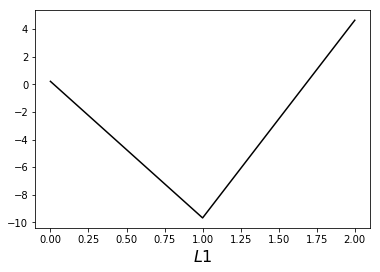

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

# 3 層神經網路

In [5]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(3)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,2)) - 1
# define syn1
syn1 = 2*np.random.random((2,1)) - 1

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn1_history = [syn1]

In [6]:
for iter in range(10000):
# forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0)) #l1 (為隱藏層)
    l2 = nonlin(np.dot(l1,syn1)) #l2 (即為y預測值)

# backward propagation  
    l2_error = y - l2
    l2_delta = l2_error * nonlin(l2,True)
    
    l1_error = l2_delta.dot(syn1.T)   #the first-hidden layer error # 在這裡卡很久
    l1_delta = l1_error * nonlin(l1,True)
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    syn1 += np.dot(l1.T,l2_delta)

print("Output After Training:")
print(l2)
print("\n Real Output:")
print(y)

Output After Training:
[[0.99436933]
 [0.0055255 ]
 [0.9955285 ]
 [0.00616221]]

 Real Output:
[[1]
 [0]
 [1]
 [0]]


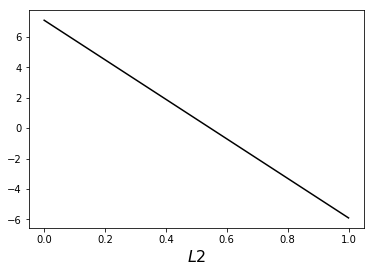

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn1_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()